In [54]:
import os
import sys
import json
import requests
import argparse
from pprint import pprint
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [5]:
from forex_python.converter import CurrencyRates

In [6]:
def returnConversion(location):
    c = CurrencyRates()
    with open('common_currencies.json') as currency_file:
        currencies = json.load(currency_file)
    for code, info in currencies.iteritems():
        if info['capital'] == location:
            if code == 'EUR': return 1.
            conversion = c.get_rate(code, 'EUR')
            break
        else: conversion = 1.

    return conversion

In [7]:
location = "london"

In [8]:
page = 'https://{0}.craigslist.org/search/bia'.format(location)

In [9]:
raw = requests.get(page).text
soup = BeautifulSoup(raw,'lxml')

In [10]:
title = soup.title.text
print(title)

london, UK bicycles  - craigslist


In [22]:
results =  soup.find_all('li',class_='result-row')

In [13]:
conversion = returnConversion(location)

In [14]:
print(conversion)

1.0


In [42]:
data = {}
data[location] = {}
df_info = []
for result in results:
    # Check if Euro already marked in price
    if u'\u20AC' in result.a.get_text(): conversion = 1.
    price = result.a.get_text().encode('ascii', 'ignore').replace('\n','')
    if not price: continue
    price = int(float(price)*conversion)
    link = result.a['href']
    data[location][price] = {}
    data[location][price]['link'] = result.a['href']
    data[location][price]['description'] = result.find('a',class_='result-title hdrlnk').text
    loc = result.a['href'].split('//')[1].split(('.'))[0] if 'https' in result.a['href'] else location
    data[location][price]['location'] = loc
    df_info.append( 
         {'price' : price, 'location': loc }
    )

In [43]:
df = pd.DataFrame(df_info)

In [44]:
df.describe()

,price
count,18.000000
mean,810.555556
std,860.393017
min,20.000000
25%,200.000000
50%,400.000000
75%,1450.000000
max,2700.000000


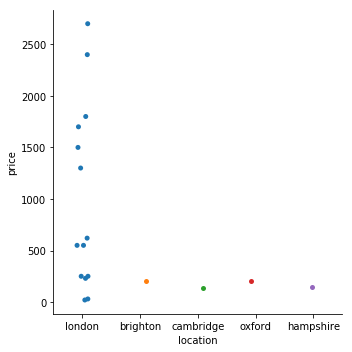

In [46]:
sns.catplot(x="location",y="price", data=df)

In [53]:
# Let's add more locations
locations = ['london', 'amsterdam', 'berlin']

In [55]:
def get_response(location):
    page = 'https://{0}.craigslist.org/search/bia'.format(location)
    raw = requests.get(page).text
    time.sleep(5)
    soup = BeautifulSoup(raw,'lxml')
    results =  soup.find_all('li',class_='result-row')
    return results

In [74]:
def parse_results(location):
    data = {}
    data[location] = {}
    conversion = returnConversion(location)
    print("Conversion for location: ", location + " : " + str(conversion))
    for result in get_response(location):
        # Check if Euro already marked in price
        if u'\u20AC' in result.a.get_text(): conversion = 1.
        price = result.a.get_text().encode('ascii', 'ignore').replace('\n','')
        if not price: continue
        price = int(float(price)*conversion)
        link = result.a['href']
        data[location][price] = {}
        data[location][price]['link'] = result.a['href']
        data[location][price]['description'] = result.find('a',class_='result-title hdrlnk').text
        loc = result.a['href'].split('//')[1].split(('.'))[0] if 'https' in result.a['href'] else location
        data[location][price]['location'] = loc
        df_info.append( 
             {'price' : price, 'location': loc }
        )
    return df_info

In [75]:
df_info = []
for location in locations:
    parse_results(location)

('Conversion for location: ', 'london : 1.0')
('Conversion for location: ', 'amsterdam : 1.0')
('Conversion for location: ', 'berlin : 1.0')


In [72]:
df = pd.DataFrame(df_info)

In [73]:
df.tail()

,location,price
85,berlin,200
86,berlin,25
87,berlin,1
88,berlin,400
89,hamburg,8


In [76]:
returnConversion('berlin')

1.0